## 1: Importing Libraries and Loading Data

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Model Generation and Training

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time

layer_configs = [
    {'layers': [32, 64], 'neurons': [128]},
    {'layers': [32, 64, 128], 'neurons': [256]},
    {'layers': [64, 128, 256], 'neurons': [512]},
]

models = []
histories = []

for i, config in enumerate(layer_configs):
    print(f"Training Model {i + 1}/{len(layer_configs)}")

    model = Sequential()

    for num_filters in config['layers']:
        model.add(Conv2D(num_filters, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    model.add(Flatten())

    for num_neurons in config['neurons']:
        model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    start_time = time.time()

    # Define early stopping and model checkpoint callbacks
    early_stopping = EarlyStopping(patience=3, monitor='val_loss', verbose=1)
    model_checkpoint = ModelCheckpoint(f'mnist_model_{i + 1}.h5', monitor='val_loss', save_best_only=False)

    history = model.fit(
        x_train,
        y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )

    end_time = time.time()
    training_time = end_time - start_time

    models.append(model)
    histories.append(history)

    print(f"Model {i + 1} trained in {training_time:.2f} seconds\n")


Training Model 1/3
Epoch 1/100
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2419 - accuracy: 0.9242 - val_loss: 0.0630 - val_accuracy: 0.9811
Epoch 2/100
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0950 - accuracy: 0.9714 - val_loss: 0.0452 - val_accuracy: 0.9865
Epoch 3/100
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0690 - accuracy: 0.9794 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 4/100
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0362 - val_accuracy: 0.9898
Epoch 5/100
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0509 - accuracy: 0.9851 - val_loss: 0.0341 - val_accuracy: 0.9902
Epoch 6/100
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0440 - accuracy: 0.9858 - val_loss: 0.0407 - val_accuracy: 0.9886
Epoch 7/100
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0409 - accuracy: 0

## 3: Model Evaluation and Plotting

313/313 [==============================] - 1s 4ms/step - loss: 0.0224 - accuracy: 0.9925
Model 1 - Test loss: 0.022398661822080612, Test accuracy: 0.9925000071525574
Model 1 - Training accuracy: 0.9903541803359985, Validation accuracy: 0.9912499785423279
Model 1 - Training loss: 0.029144058004021645, Validation loss: 0.0323871485888958
313/313 [==============================] - 1s 4ms/step - loss: 0.0545 - accuracy: 0.9854
Model 2 - Test loss: 0.05453439801931381, Test accuracy: 0.9854000210762024
Model 2 - Training accuracy: 0.9868333339691162, Validation accuracy: 0.9856666922569275
Model 2 - Training loss: 0.04245271161198616, Validation loss: 0.05138146132230759
313/313 [==============================] - 4s 11ms/step - loss: 0.0524 - accuracy: 0.9870
Model 3 - Test loss: 0.052381519228219986, Test accuracy: 0.9869999885559082
Model 3 - Training accuracy: 0.9915416836738586, Validation accuracy: 0.987500011920929
Model 3 - Training loss: 0.02878858894109726, Validation loss: 0.04977

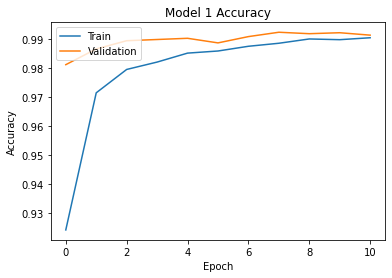

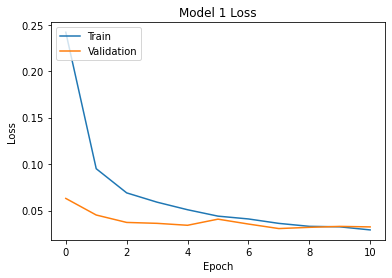

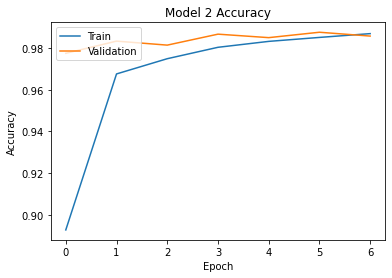

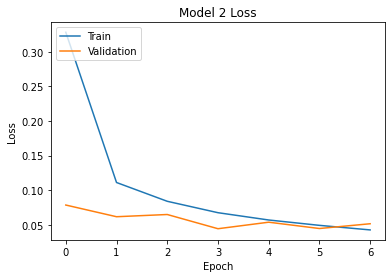

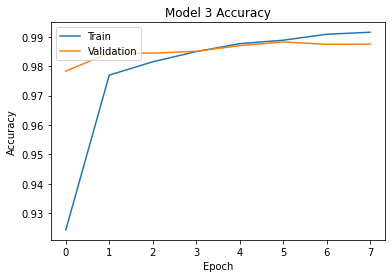

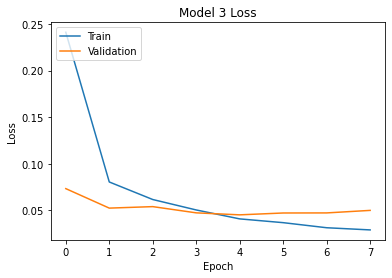

In [12]:
accuracies = []
losses = []
all_histories = []

for i, model in enumerate(models):
    score = model.evaluate(x_test, y_test)

    test_loss = score[0]
    test_accuracy = score[1]

    print(f"Model {i + 1} - Test loss: {test_loss}, Test accuracy: {test_accuracy}")

    accuracies.append(test_accuracy)
    losses.append(test_loss)

    history = histories[i].history

    all_histories.append(history)
    
    print(f"Model {i + 1} - Training accuracy: {history['accuracy'][-1]}, Validation accuracy: {history['val_accuracy'][-1]}")
    print(f"Model {i + 1} - Training loss: {history['loss'][-1]}, Validation loss: {history['val_loss'][-1]}")    

    plt.figure()
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title(f'Model {i + 1} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.figure()
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(f'Model {i + 1} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

# Show all plots after the loop
plt.show()


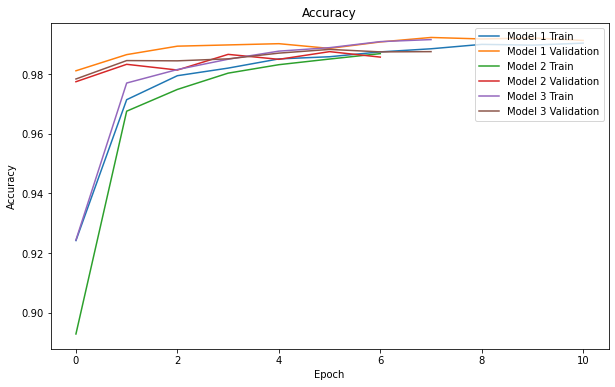

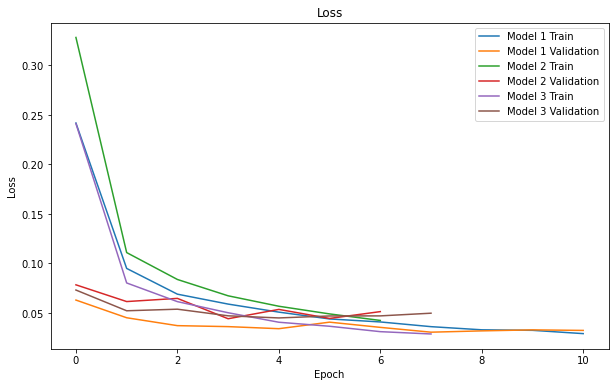

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy and loss for all models
plt.figure(figsize=(10, 6))  # Set the figure size to (10, 6)
for i, history in enumerate(all_histories):
    plt.plot(history['accuracy'], label=f"Model {i + 1} Train")
    plt.plot(history['val_accuracy'], label=f"Model {i + 1} Validation")
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.figure(figsize=(10, 6))  # Set the figure size to (10, 6)
for i, history in enumerate(all_histories):
    plt.plot(history['loss'], label=f"Model {i + 1} Train")
    plt.plot(history['val_loss'], label=f"Model {i + 1} Validation")
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show all plots
plt.show()
